In [30]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [31]:
slow_geol = Dataset('slow/geology-optimized.nc')
print(slow_geol.variables.keys())

slow_out = Dataset('slow/output.nc')
print(slow_out.variables.keys())

dict_keys(['y', 'x', 'usurf', 'thk', 'slidingco', 'velsurf_mag', 'velsurfobs_mag', 'divflux', 'icemask'])
dict_keys(['time', 'y', 'x', 'z', 'topg', 'usurf', 'thk', 'smb', 'velsurf_mag', 'velbase_mag', 'uvelbase', 'vvelbase'])


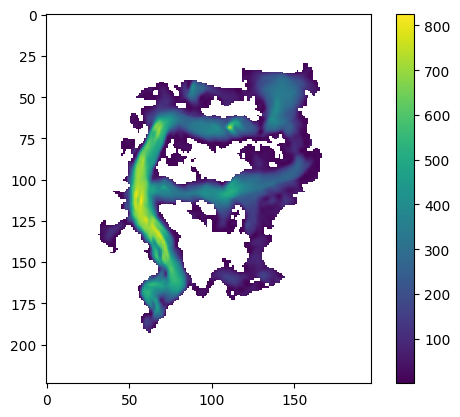

In [32]:
var = slow_geol.variables['thk']
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

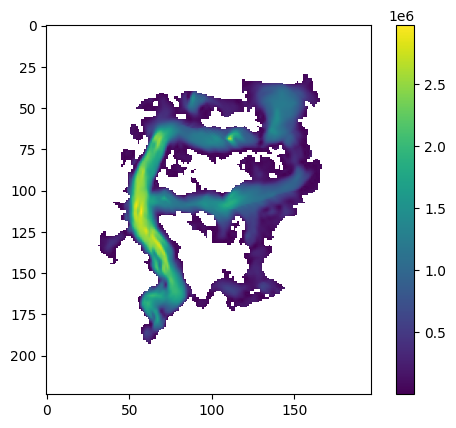

In [33]:
var = slow_geol.variables['thk'][:] * 917 * 9.81 * 0.4
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

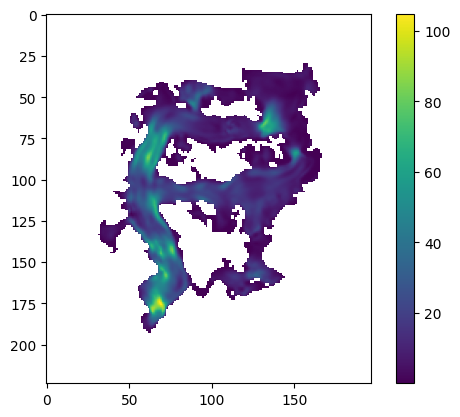

In [34]:
var = slow_out.variables['velbase_mag'][:]
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'viridis')
plt.colorbar(im)
plt.show()

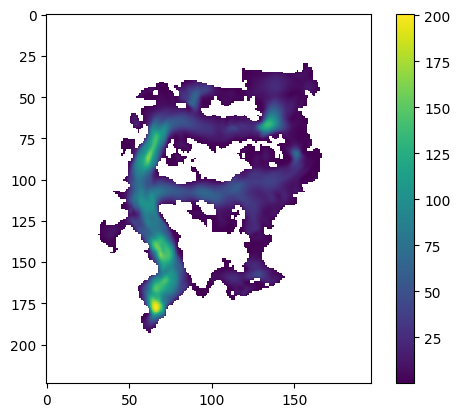

In [35]:
var = slow_out.variables['velsurf_mag'][:]
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'viridis')
plt.colorbar(im)
plt.show()

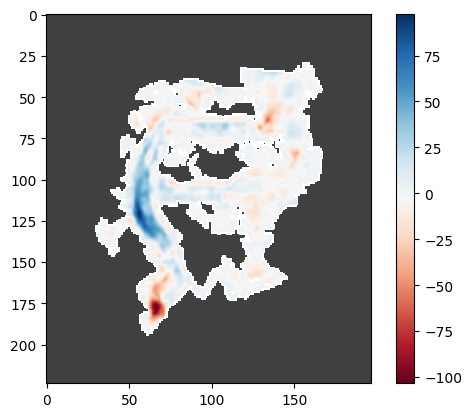

In [36]:
var = slow_geol.variables['velsurfobs_mag'] - slow_out.variables['velsurf_mag'][:]
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'RdBu')
plt.imshow(np.flip(np.where(slow_geol.variables['thk'][:] < 0.1, 0.2, np.nan), axis = 0), cmap = 'Greys_r', vmax = 1, vmin = 0)
plt.colorbar(im)
plt.show()

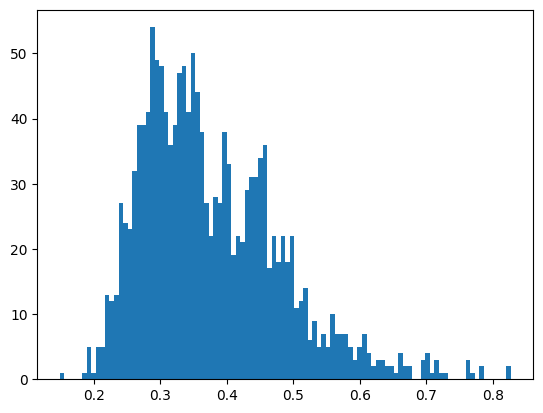

In [37]:
sliding_velocity = slow_out.variables['velbase_mag'][0]
surface_velocity = slow_out.variables['velsurf_mag'][0]
ratio = (sliding_velocity / surface_velocity)[
    (slow_geol.variables['thk'][:] > 400)
    & (slow_geol.variables['thk'][:] < 800)
]

plt.hist(ratio[ratio < 2], bins = 100)
plt.show()

In [38]:
fast_geol = Dataset('fast/geology-optimized.nc')
print(slow_geol.variables.keys())

fast_out = Dataset('fast/output.nc')
print(slow_out.variables.keys())

dict_keys(['y', 'x', 'usurf', 'thk', 'slidingco', 'velsurf_mag', 'velsurfobs_mag', 'divflux', 'icemask'])
dict_keys(['time', 'y', 'x', 'z', 'topg', 'usurf', 'thk', 'smb', 'velsurf_mag', 'velbase_mag', 'uvelbase', 'vvelbase'])


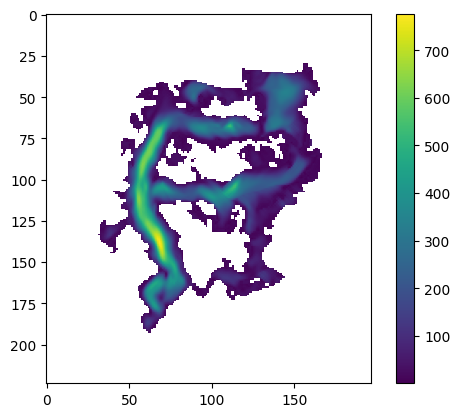

In [39]:
var = fast_geol.variables['thk'][:]
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

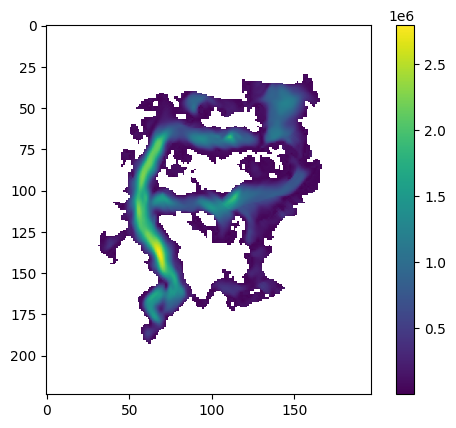

In [40]:
var = fast_geol.variables['thk'][:] * 917 * 9.81 * 0.4
field = np.flip(np.where(slow_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 0)
im = plt.imshow(field)
plt.colorbar(im)
plt.show()

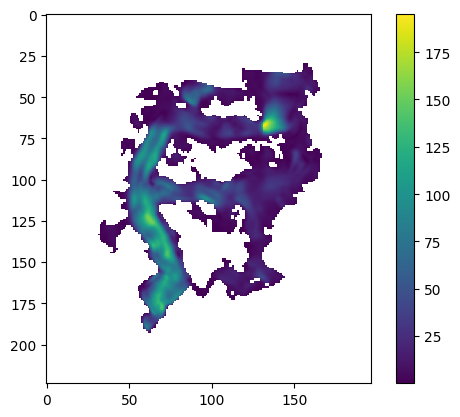

In [41]:
var = fast_out.variables['velbase_mag'][:]
field = np.flip(np.where(fast_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'viridis')
plt.colorbar(im)
plt.show()

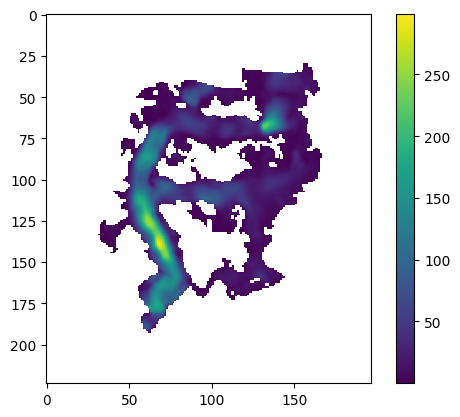

In [42]:
var = fast_out.variables['velsurf_mag'][:]
field = np.flip(np.where(fast_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'viridis')
plt.colorbar(im)
plt.show()

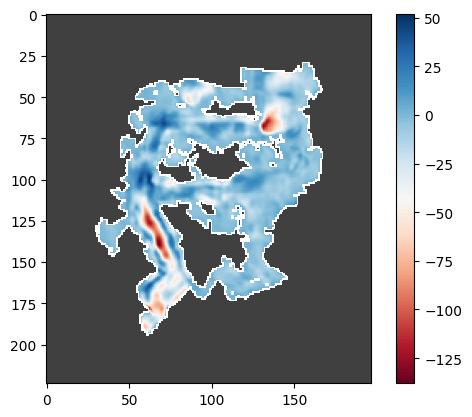

In [43]:
var = fast_geol.variables['velsurfobs_mag'] - fast_out.variables['velsurf_mag'][:]
field = np.flip(np.where(fast_geol.variables['thk'][:] > 0.1, var, np.nan), axis = 1)
im = plt.imshow(field[0], cmap = 'RdBu')
plt.imshow(np.flip(np.where(fast_geol.variables['thk'][:] < 0.1, 0.2, np.nan), axis = 0), cmap = 'Greys_r', vmax = 1, vmin = 0)
plt.colorbar(im)
plt.show()

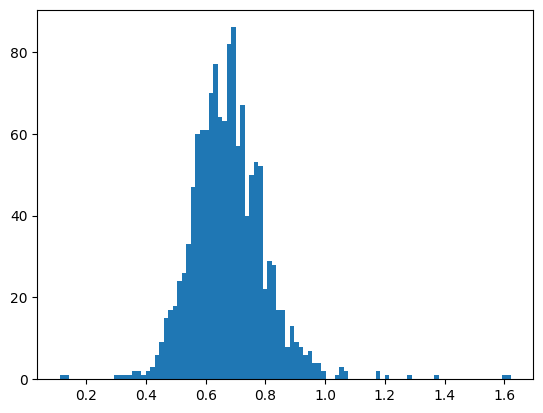

In [44]:
sliding_velocity = fast_out.variables['velbase_mag'][0]
surface_velocity = fast_out.variables['velsurf_mag'][0]
ratio = (sliding_velocity / surface_velocity)[
    (fast_geol.variables['thk'][:] > 300)
    & (fast_geol.variables['thk'][:] < 600)
]

plt.hist(ratio[ratio < 2], bins = 100)
plt.show()